In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
import sys
sys.path.insert(1, '/Users/andrew/Documents/python/pygplates_rev28_python37_MacOS64')
import pygplates

#from matplotlib import cm
from cmcrameri import cm

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits import axes_grid1

def add_colorbar(im, aspect=20, pad_fraction=0.5, **kwargs):
    """Add a vertical color bar to an image plot."""
    divider = axes_grid1.make_axes_locatable(im.axes)
    width = axes_grid1.axes_size.AxesY(im.axes, aspect=1./aspect)
    pad = axes_grid1.axes_size.Fraction(pad_fraction, width)
    current_ax = plt.gca()
    cax = divider.append_axes("right", size=width, pad=pad)
    plt.sca(current_ax)
    return im.axes.figure.colorbar(im, cax=cax, **kwargs)

In [3]:
#set directories
platedir = '/Users/andrew/Documents/GitHub/EarthBytePlateMotionModel-ARCHIVE/Muller++_2015_AREPS_CORRECTED/'
savedir = '/Users/andrew/Documents/Data/Merdith_sub_zones/'
datadir = '/Users/andrew/Documents/Data/Merdith_sub_zones/'
figuredir = '/Users/andrew/Documents/scripts_output/serpentinte_subduction_zones/'
#model files
rotfile = '%sGlobal_EarthByte_230-0Ma_GK07_AREPS.rot' % platedir
COBs = '%sAgeGridInput/Global_EarthByte_230-0Ma_GK07_AREPS_COB_Terranes.gpml' % platedir
coastlines = '%sGlobal_EarthByte_230-0Ma_GK07_AREPS_Coastlines.gpml' % platedir
isochrons = '%sAgeGridInput/Global_EarthByte_230-0Ma_GK07_AREPS_Isochrons.gpml' % platedir
input_topology_filename = ['%sGlobal_EarthByte_230-0Ma_GK07_AREPS_PlateBoundaries.gpml' % platedir,
                           '%sGlobal_EarthByte_230-0Ma_GK07_AREPS_Topology_BuildingBlocks.gpml' % platedir]

rotation_model = pygplates.RotationModel(rotfile)

#topologies for our subduction points
time = 0 

resolved_topologies = []
shared_boundary_sections = []

pygplates.resolve_topologies(input_topology_filename, rotation_model,
                             resolved_topologies, int(time), shared_boundary_sections)
#deterministic output
shared_boundary_sections = sorted(shared_boundary_sections, 
                                  key=lambda section : section.get_feature().get_feature_id().get_string())
#some densities
perid_density_g_cm3 = 3.3 #g/cm3
perid_density_g_km3 = perid_density_g_cm3 * 100000**3
perid_density_kg_km3 = perid_density_g_km3 * 1e-3

#some densities
perid_density_g_cm3 = 3.3 #g/cm3
perid_density_g_km3 = perid_density_g_cm3 * 100000**3
perid_density_kg_km3 = perid_density_g_km3 * 1e-3

In [ ]:
subduction_tracks_20210419.pickle

In [22]:
with open('%ssubduction_tracks_20210419.pickle' % datadir, 'rb') as f:
    tracks = pickle.load(f)
    
df_syracuse = pd.read_csv('%ssyracuse_thermal/Table_2_sub_parameters.csv' % datadir)

In [23]:
sub_length = []
sub_area = []
sub_vol = []
for i in np.arange(0,len(tracks),1):
    #print(i)
    sub_vol.append(tracks[i]['cum_distance'].values[-1]*tracks[i]['sub_length'].values[-1]*min(tracks[i]['peridotite'].values))
    sub_area.append(tracks[i]['cum_distance'].values[-1]*tracks[i]['sub_length'].values[-1])
    sub_length.append(tracks[i]['sub_length'].values[-1])

In [24]:
#classify each sub zone region
#to get means and stds of each sub zone region
all_perids = []
all_temps = []
all_rhos = []
all_ages = []
individual_track_perid_total = []
individual_track_perid_area_total = []
individual_track_dip = []
individual_track_dip_all = []
individual_track_CR = []
individual_track_SR = []
new_sub_coords = []
sub_results = []
sub_results_area = []
#define target temp and pressure for serpentinisation
target_temp = [100, 700]
target_pressure = [0, 7]
sub_names = []
#define arbitary peridotite value (in km)
perid_value = 0.3

for sub_zone_name in df_syracuse['Name']:
    sub_zone_df = []
    temps = []
    rhos = []
    perids = []
    perids_area = []
    ages = []
    tmp_sub_coords = []
    print(sub_zone_name)
    sub_names.append(sub_zone_name)
    #for i in np.arange(target_sub_chron[0],target_sub_chron[1]+1, 1):

    for ind, track in enumerate(tracks):
        #print(ind)
        tmp_df = track[(track['sub_zone'] == sub_zone_name)
                     & (track['temp'] > target_temp[0])
                     & (track['temp'] < target_temp[1])
                     & (track['pressure'] > target_pressure[0])
                     & (track['pressure'] < target_pressure[1])] 
        if tmp_df.empty is False:
            #if empty discard, if full append
            tmp_individual_track_dip = []
            tmp_individual_track_CR = []
            tmp_individual_track_SR = []

            sub_zone_df.append(tmp_df)
            temps.append(tmp_df['temp'].values)
            rhos.append(tmp_df['pressure'].values)
            ages.append(tmp_df['age'].values)
            #dummy_perid = np.ones_like(tmp_df['peridotite'].values)*perid_value 
            dummy_perid = tmp_df['peridotite'].values
###
            #dummy_perid = full_tmp_df['peridotite'].values

            perid_volume = (dummy_perid * tmp_df['slab_section_length'] * tmp_df['sub_length']).sum()
            perid_area = (dummy_perid * tmp_df['slab_section_length'] * 1).sum()
            perids.append(perid_volume)
            perids_area.append(perid_area)
### 
            tmp_sub_coords.append((track['lon'].values[0], track['lat'].values[0]))
            #individual_track_perid_total.append(perids)
            #individual_track_perid_area_total.append(perids_area)
            tmp_individual_track_dip.append(tmp_df['dip'])
            tmp_individual_track_CR.append(tmp_df['conv_rate'])
            tmp_individual_track_SR.append(tmp_df['SR'])
            
                    #print(sub_zone_name,temps)
        if not perids:
            all_perids.append(np.asarray([0]))
            all_temps.append(np.asarray([0]))
            all_rhos.append(np.asarray([0]))
            all_ages.append(np.asarray([0]))
        else:
            all_perids.append(perids)
            all_temps.append(np.concatenate(temps).ravel())
            all_rhos.append(np.concatenate(rhos).ravel())
            all_ages.append(np.concatenate(ages).ravel())
    sub_results.append([sub_zone_name, np.nansum(perids)])
    sub_results_area.append([sub_zone_name, np.nansum(perids_area)])
    individual_track_perid_total.append(perids)
    individual_track_perid_area_total.append(perids_area)
    individual_track_dip.append([sub_zone_name, np.mean(tmp_individual_track_dip),np.std(tmp_individual_track_dip)])
    individual_track_dip_all.append(np.asarray(tmp_individual_track_dip))
    individual_track_CR.append([sub_zone_name, np.mean(tmp_individual_track_CR),np.std(tmp_individual_track_CR)])
    individual_track_SR.append([sub_zone_name, np.mean(tmp_individual_track_SR),np.std(tmp_individual_track_SR)])
    new_sub_coords.append(tmp_sub_coords)
all_perids = np.asarray(all_perids, dtype=object)
all_temps = np.asarray(all_temps, dtype=object)
all_rhos = np.asarray(all_rhos, dtype=object)
all_ages = np.asarray(all_ages, dtype=object)


Aegean
Alaska
Alaska_Peninsula
Bali_Lombok
Bonin
C_Aleut
C_Chile
C_Chile_gap
C_Honshu
C_Peru_gap
C_Sumatra
Calabria
Central_Cascadia
Colombia_Ecuador
Costa_Rica
E_Aleut
E_Banda_Sea
GuatElSal
Hokkaido
Izu
Java
Kamchatka
Kermadec
Kyushu
Mexico
NC_Chile
N_Antilles
N_Chile
N_Honshu
N_Kurile
N_Marianas
N_Peru_gap
N_Phil
N_Sumatra
N_Vanuatu
Nankai
New_Britain
New_Zealand
Nicaragua
North_Cascadia
Peru
Ryukyu
SC_Chile
S_Antilles
S_Chile
S_Kurile
S_Marianas
S_Phil
S_Sumatra
S_Vanuatu
Scotia
Solomon
Sunda_Strait
Tonga
W_Aleut
W_Banda_Sea


In [25]:
sub_results_vals = [i[1] for i in sub_results]
sub_results_vals_area = [i[1] for i in sub_results_area]
sub_results_names = [i[0] for i in sub_results]

results_df = pd.DataFrame({'sub_zones': sub_results_names,
                           'sub_results_vals': sub_results_vals,
                           'sub_results_vals_area':sub_results_vals_area})

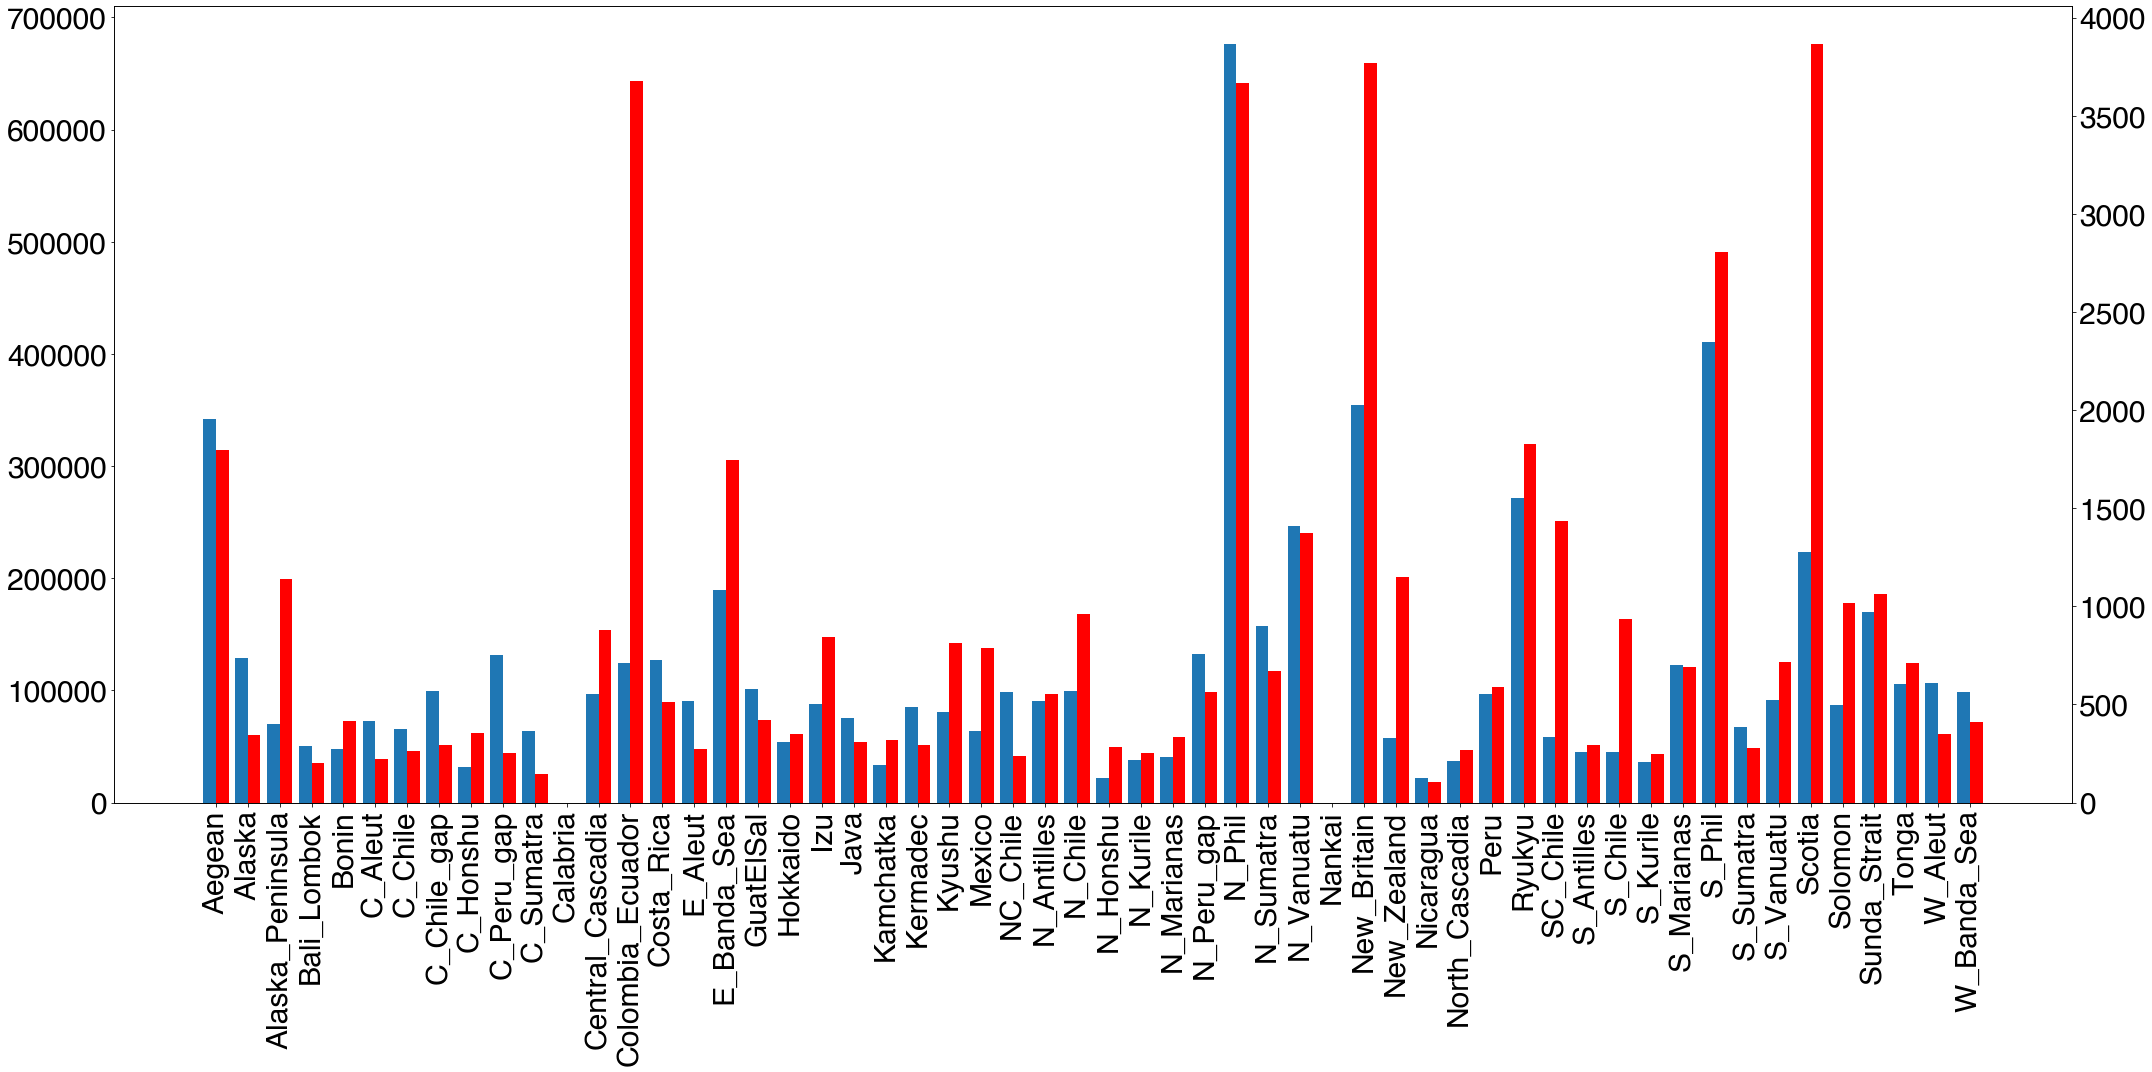

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(30,15))
x = np.arange(0,len(sub_results_vals),1)
ax2 = ax.twinx()
width=0.4
ax.bar(x-width, sub_results_vals, width=width, align='edge')
ax2.bar(x, sub_results_vals_area, width=width, color='red', align='edge')
ax.set_xticks(x)#+width)
ax.set_xticklabels(sub_results_names, rotation = 90, ha='center')
ax.tick_params(labelsize=30)
ax2.tick_params(labelsize=30)
plt.tight_layout()

In [27]:
results_df.style.background_gradient(cmap=cm.batlow)

,sub_zones,sub_results_vals,sub_results_vals_area
0,Aegean,342128.966762,1795.355590
1,Alaska,128800.248680,345.966574
2,Alaska_Peninsula,70325.601145,1139.470240
3,Bali_Lombok,50651.436705,203.547560
4,Bonin,47488.104654,417.704808
5,C_Aleut,72406.393405,224.261710
6,C_Chile,65517.397095,261.074941
7,C_Chile_gap,99735.333612,291.584900
8,C_Honshu,31965.610811,352.528047
9,C_Peru_gap,131486.887273,254.171196


In [28]:
for ind, i in enumerate(sub_names):
    print(i, 'DIP: mean | std | result ||', individual_track_dip[ind][1], '|',individual_track_dip[ind][2], '|', sub_results_area[ind][1])
    print(i, 'CR: mean | std | result ||', individual_track_CR[ind][1], '|',individual_track_CR[ind][2], '|', sub_results_area[ind][1])    
    print(i, 'SR: mean | std | result ||', individual_track_SR[ind][1], '|',individual_track_SR[ind][2], '|', sub_results_area[ind][1])

Aegean DIP: mean | std | result || 26.1077804331186 | 15.098668785646694 | 1795.3555901840393
Aegean CR: mean | std | result || 18.104472962332867 | 0.0 | 1795.3555901840393
Aegean SR: mean | std | result || 1.4144419487668385 | 0.0 | 1795.3555901840393
Alaska DIP: mean | std | result || 18.94629997798158 | 16.247791264630457 | 345.96657355553555
Alaska CR: mean | std | result || 20.481718216688844 | 19.929552564238982 | 345.96657355553555
Alaska SR: mean | std | result || 47.87359737268952 | 15.28705209697972 | 345.96657355553555
Alaska_Peninsula DIP: mean | std | result || 27.258523910893548 | 15.182248115473406 | 1139.470240443669
Alaska_Peninsula CR: mean | std | result || 29.716118625894996 | 22.01933026823032 | 1139.470240443669
Alaska_Peninsula SR: mean | std | result || 56.1627283213916 | 6.046267136539271 | 1139.470240443669
Bali_Lombok DIP: mean | std | result || 39.33775446258916 | 11.793913620969592 | 203.54756033942638
Bali_Lombok CR: mean | std | result || 53.826258366537

Text(0.2, 0.85, 'a')

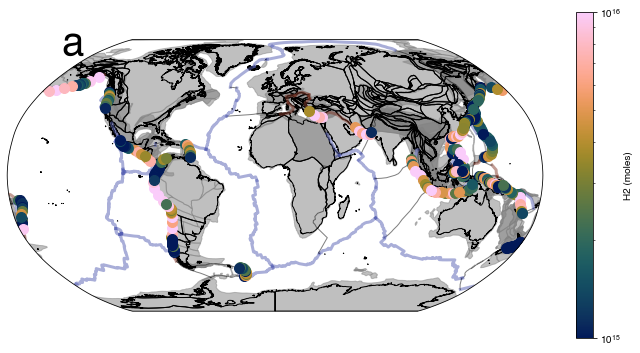

In [29]:
#globe plotting
time = 0
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6),
                       subplot_kw={'projection': ccrs.Robinson(central_longitude=0)})
#fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24,12),
#                       subplot_kw={'projection': ccrs.Orthographic(central_longitude=cross_section_points[index]['lon'].mean(),
#                                                                   central_latitude=cross_section_points[index]['lat'].mean())})
data_crs = ccrs.Geodetic()
poly_data_crs = ccrs.PlateCarree()
date_line_wrapper = pygplates.DateLineWrapper(0)

reconstructed_polygons = []
reconstructed_isochrons = []
reconstructed_COBs = []

# Alternative method using 'partition_geometry'
resolved_topologies = []
shared_boundary_sections = []

pygplates.resolve_topologies(input_topology_filename, rotation_model,
                             resolved_topologies, int(time), shared_boundary_sections)
#deterministic output
shared_boundary_sections = sorted(shared_boundary_sections, key=lambda section : section.get_feature().get_feature_id().get_string())


pygplates.reconstruct(coastlines,rotation_model, reconstructed_polygons, int(time))
pygplates.reconstruct(COBs,rotation_model, reconstructed_COBs, int(time))
pygplates.reconstruct(isochrons,rotation_model, reconstructed_isochrons, int(time))

#ax.plot([cross_section_points[index]['lon'].iloc[0], cross_section_points[index]['lon'].iloc[-1]],
#        [cross_section_points[index]['lat'].iloc[0], cross_section_points[index]['lat'].iloc[-1]],
#        transform=poly_data_crs, c='k',lw=5,zorder=3)

for polygon in reconstructed_polygons:
    poly_geom = pygplates.PolygonOnSphere(polygon.get_reconstructed_geometry())
    wrapped_polys = date_line_wrapper.wrap(poly_geom, 1)
    for wrapped_poly in wrapped_polys:
        wrapped_poly_lat = []
        wrapped_poly_lon = []
        for wrapped_poly_point in wrapped_poly.get_exterior_points():
            wrapped_poly_lat.append(wrapped_poly_point.get_latitude())
            wrapped_poly_lon.append(wrapped_poly_point.get_longitude())

        ax.plot(wrapped_poly_lon, wrapped_poly_lat, color='k', linewidth=1 ,zorder=0, transform=poly_data_crs)

for polygon in reconstructed_COBs:
    poly_geom = pygplates.PolygonOnSphere(polygon.get_reconstructed_geometry())
    wrapped_polys = date_line_wrapper.wrap(poly_geom, 1)
    for wrapped_poly in wrapped_polys:
        wrapped_poly_lat = []
        wrapped_poly_lon = []
        for wrapped_poly_point in wrapped_poly.get_exterior_points():
            wrapped_poly_lat.append(wrapped_poly_point.get_latitude())
            wrapped_poly_lon.append(wrapped_poly_point.get_longitude())

        #ax.plot(wrapped_poly_lon, wrapped_poly_lat, color='k', linewidth=1 ,zorder=0, transform=poly_data_crs)
        ax.fill(wrapped_poly_lon, wrapped_poly_lat, color='grey', alpha=0.5,
                linewidth=1 ,zorder=0, transform=poly_data_crs)

for shared_boundary_section in shared_boundary_sections:
    if shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.gpml_mid_ocean_ridge:
        for shared_sub_segment in shared_boundary_section.get_shared_sub_segments():
            tmp = shared_sub_segment.get_resolved_geometry()
            wrapped_polylines = date_line_wrapper.wrap(tmp)
            for wrapped_polyline in wrapped_polylines:
                mor_wrapped_point_lat = []
                mor_wrapped_point_lon = []
                for wrapped_point in wrapped_polyline.get_points():
                    mor_wrapped_point_lat.append(wrapped_point.get_latitude())
                    mor_wrapped_point_lon.append(wrapped_point.get_longitude())
                ax.plot(mor_wrapped_point_lon,mor_wrapped_point_lat, color='#545eb3',
                        linewidth=3, alpha=0.5, zorder=1, transform=data_crs)

    elif shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.gpml_subduction_zone:
        for shared_sub_segment in shared_boundary_section.get_shared_sub_segments():
            tmp = shared_sub_segment.get_resolved_geometry()
            wrapped_polylines = date_line_wrapper.wrap(tmp)
            for wrapped_polyline in wrapped_polylines:
                mor_wrapped_point_lat = []
                mor_wrapped_point_lon = []
                for wrapped_point in wrapped_polyline.get_points():
                    mor_wrapped_point_lat.append(wrapped_point.get_latitude())
                    mor_wrapped_point_lon.append(wrapped_point.get_longitude())
                ax.plot(mor_wrapped_point_lon,mor_wrapped_point_lat, color='#853a2b',
                        linewidth=3, alpha=0.5, zorder=1, transform=data_crs)                
    else:
        for shared_sub_segment in shared_boundary_section.get_shared_sub_segments():
            tmp = shared_sub_segment.get_resolved_geometry()
            wrapped_polylines = date_line_wrapper.wrap(tmp)
            for wrapped_polyline in wrapped_polylines:
                mor_wrapped_point_lat = []
                mor_wrapped_point_lon = []
                for wrapped_point in wrapped_polyline.get_points():
                    mor_wrapped_point_lat.append(wrapped_point.get_latitude())
                    mor_wrapped_point_lon.append(wrapped_point.get_longitude())
                ax.plot(mor_wrapped_point_lon,mor_wrapped_point_lat, color='k',
                        linewidth=1, alpha=0.5, zorder=1, transform=data_crs)

#flatten lists for plotting
flat_sub_coords = [item for sublist in new_sub_coords for item in sublist]
flat_individual_track_perid_total = [item for sublist in individual_track_perid_total for item in sublist]
                
for ind, i in enumerate(flat_sub_coords):

    cs = ax.scatter(i[0],i[1],c=np.nansum(flat_individual_track_perid_total[ind])*perid_density_kg_km3*10e-2/(1.00784*2), s=100, 
                    zorder=2,norm=LogNorm(vmin=1e15,vmax=1e16), transform=poly_data_crs, cmap=cm.batlow)#

fig.colorbar(cs, label='H2 (moles)')

ax.set_global()
fig.suptitle('a', x=0.20,y=0.85, fontsize=40)

#plt.savefig('%sPresent_day_h2.pdf' % figuredir)

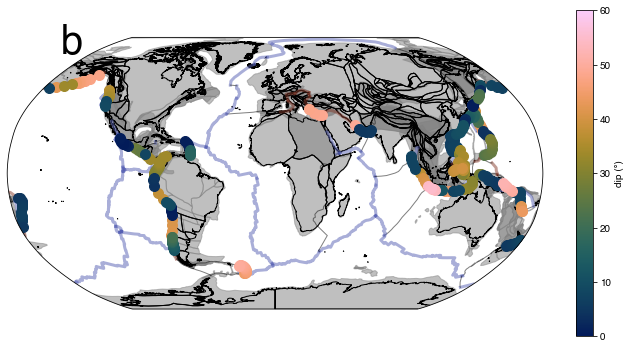

In [30]:
#globe plotting
time = 0
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6),
                       subplot_kw={'projection': ccrs.Robinson(central_longitude=0)})
#fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(24,12),
#                       subplot_kw={'projection': ccrs.Orthographic(central_longitude=cross_section_points[index]['lon'].mean(),
#                                                                   central_latitude=cross_section_points[index]['lat'].mean())})
data_crs = ccrs.Geodetic()
poly_data_crs = ccrs.PlateCarree()
date_line_wrapper = pygplates.DateLineWrapper(0)

reconstructed_polygons = []
reconstructed_isochrons = []
reconstructed_COBs = []

# Alternative method using 'partition_geometry'
resolved_topologies = []
shared_boundary_sections = []

pygplates.resolve_topologies(input_topology_filename, rotation_model,
                             resolved_topologies, int(time), shared_boundary_sections)
#deterministic output
shared_boundary_sections = sorted(shared_boundary_sections, key=lambda section : section.get_feature().get_feature_id().get_string())


pygplates.reconstruct(coastlines,rotation_model, reconstructed_polygons, int(time))
pygplates.reconstruct(COBs,rotation_model, reconstructed_COBs, int(time))
pygplates.reconstruct(isochrons,rotation_model, reconstructed_isochrons, int(time))

#ax.plot([cross_section_points[index]['lon'].iloc[0], cross_section_points[index]['lon'].iloc[-1]],
#        [cross_section_points[index]['lat'].iloc[0], cross_section_points[index]['lat'].iloc[-1]],
#        transform=poly_data_crs, c='k',lw=5,zorder=3)

for polygon in reconstructed_polygons:
    poly_geom = pygplates.PolygonOnSphere(polygon.get_reconstructed_geometry())
    wrapped_polys = date_line_wrapper.wrap(poly_geom, 1)
    for wrapped_poly in wrapped_polys:
        wrapped_poly_lat = []
        wrapped_poly_lon = []
        for wrapped_poly_point in wrapped_poly.get_exterior_points():
            wrapped_poly_lat.append(wrapped_poly_point.get_latitude())
            wrapped_poly_lon.append(wrapped_poly_point.get_longitude())

        ax.plot(wrapped_poly_lon, wrapped_poly_lat, color='k', linewidth=1 ,zorder=0, transform=poly_data_crs)

for polygon in reconstructed_COBs:
    poly_geom = pygplates.PolygonOnSphere(polygon.get_reconstructed_geometry())
    wrapped_polys = date_line_wrapper.wrap(poly_geom, 1)
    for wrapped_poly in wrapped_polys:
        wrapped_poly_lat = []
        wrapped_poly_lon = []
        for wrapped_poly_point in wrapped_poly.get_exterior_points():
            wrapped_poly_lat.append(wrapped_poly_point.get_latitude())
            wrapped_poly_lon.append(wrapped_poly_point.get_longitude())

        #ax.plot(wrapped_poly_lon, wrapped_poly_lat, color='k', linewidth=1 ,zorder=0, transform=poly_data_crs)
        ax.fill(wrapped_poly_lon, wrapped_poly_lat, color='grey', alpha=0.5,
                linewidth=1 ,zorder=0, transform=poly_data_crs)

for shared_boundary_section in shared_boundary_sections:
    if shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.gpml_mid_ocean_ridge:
        for shared_sub_segment in shared_boundary_section.get_shared_sub_segments():
            tmp = shared_sub_segment.get_resolved_geometry()
            wrapped_polylines = date_line_wrapper.wrap(tmp)
            for wrapped_polyline in wrapped_polylines:
                mor_wrapped_point_lat = []
                mor_wrapped_point_lon = []
                for wrapped_point in wrapped_polyline.get_points():
                    mor_wrapped_point_lat.append(wrapped_point.get_latitude())
                    mor_wrapped_point_lon.append(wrapped_point.get_longitude())
                ax.plot(mor_wrapped_point_lon,mor_wrapped_point_lat, color='#545eb3',
                        linewidth=3, alpha=0.5, zorder=1, transform=data_crs)

    elif shared_boundary_section.get_feature().get_feature_type() == pygplates.FeatureType.gpml_subduction_zone:
        for shared_sub_segment in shared_boundary_section.get_shared_sub_segments():
            tmp = shared_sub_segment.get_resolved_geometry()
            wrapped_polylines = date_line_wrapper.wrap(tmp)
            for wrapped_polyline in wrapped_polylines:
                mor_wrapped_point_lat = []
                mor_wrapped_point_lon = []
                for wrapped_point in wrapped_polyline.get_points():
                    mor_wrapped_point_lat.append(wrapped_point.get_latitude())
                    mor_wrapped_point_lon.append(wrapped_point.get_longitude())
                ax.plot(mor_wrapped_point_lon,mor_wrapped_point_lat, color='#853a2b',
                        linewidth=3, alpha=0.5, zorder=1, transform=data_crs)                
    else:
        for shared_sub_segment in shared_boundary_section.get_shared_sub_segments():
            tmp = shared_sub_segment.get_resolved_geometry()
            wrapped_polylines = date_line_wrapper.wrap(tmp)
            for wrapped_polyline in wrapped_polylines:
                mor_wrapped_point_lat = []
                mor_wrapped_point_lon = []
                for wrapped_point in wrapped_polyline.get_points():
                    mor_wrapped_point_lat.append(wrapped_point.get_latitude())
                    mor_wrapped_point_lon.append(wrapped_point.get_longitude())
                ax.plot(mor_wrapped_point_lon,mor_wrapped_point_lat, color='k',
                        linewidth=1, alpha=0.5, zorder=1, transform=data_crs)

#flatten lists for plotting
flat_sub_coords = [item for sublist in new_sub_coords for item in sublist]
flat_individual_track_perid_total = [item for sublist in individual_track_perid_total for item in sublist]
flat_individual_track_dip_all = []
for i in individual_track_dip_all:
    for j in i:
        for k in j:
            flat_individual_track_dip_all.append(k)
for ind, i in enumerate(flat_sub_coords):

    cs = ax.scatter(i[0],i[1],c=np.nansum(flat_individual_track_dip_all[ind]), s=100, 
                    zorder=2,vmin=0,vmax=60, transform=poly_data_crs, cmap=cm.batlow)#

fig.colorbar(cs, label='dip (°)')
fig.suptitle('b', x=0.20,y=0.85, fontsize=40)

ax.set_global()

#plt.savefig('%sPresent_day_h2.pdf' % figuredir)

In [31]:
#seafloor consumption of east et al. 2019 for last 5 Ma (rough)
area_km2_per_1Ma = 3000000
ocean_crust_thickness = 6
ocean_crust_flux_per_1Ma = area_km2_per_1Ma * ocean_crust_thickness
our_RAP_vol_per_5Ma = np.sum(flat_individual_track_perid_total)
print(ocean_crust_flux_per_1Ma)
print(our_RAP_vol_per_5Ma)

18000000
6425288.840938618


In [32]:
np.sum(flat_individual_track_perid_total)

6425288.840938618

In [19]:
6608290.726767528/(ocean_crust_flux_per_1Ma*5)*100


7.342545251963919

In [20]:
our_RAP_vol_per_5Ma/(ocean_crust_flux_per_1Ma*5)*100

6.180702667179943

In [ ]:
#seafloor Production worman
SP_slow = 1.6 * 32300* 24
slow = 4 * 32300* 24
SP_fast = .5 * 28700* 76 
fast = 6 * 28700* 76

In [ ]:
SP_slow/(slow+fast)

In [ ]:
(SP_slow+SP_fast)/(slow+fast)*100

In [ ]:
np.sum(res)*perid_density_kg_km3*10e-2/(1.00784*2)/5/1000000

In [ ]:
4e-2/1.00784*2

In [ ]:
#convert to alberto
#15wt%
total_water_in_antigorite_kg = 0.15 * perid_density_kg_km3 * np.sum(flat_individual_track_perid_total)
total_water_to_react_kg3 = total_water_in_antigorite_kg
total_perid_to_react = total_water_to_react_kg3
#assumes 1:1 fluid:rock
#assumes for each kg of reactant upper and lower value are how much H2 is formed
upper_value_moles = 4e-2 # mol 
lower_value_moles = 1.5e-3 # mol
upper_value_kg = 4e-2 * 1.00784 * 2 / 1000
lower_value_kg = 1.5e-3 * 1.00784 * 2 / 1000
upper_total_H2_kg = upper_value_kg * total_perid_to_react
lower_total_H2_kg = lower_value_kg * total_perid_to_react
upper_total_H2_MT = upper_total_H2_kg / 1000000000
lower_total_H2_MT = lower_total_H2_kg / 1000000000
upper_total_H2_moles = upper_value_moles * total_perid_to_react
lower_total_H2_moles = lower_value_moles * total_perid_to_react
print('water (kg)',total_water_to_react_kg3)
print('upper H2 (kg per 5 Ma)', upper_total_H2_kg)
print('lower H2 (kg per 5 Ma)', lower_total_H2_kg)
print('upper H2 (MT per 5 Ma)', upper_total_H2_MT)
print('lower H2 (MT per 5 Ma)', lower_total_H2_MT)
print('upper H2 (kg per a)', upper_total_H2_kg/1000000/5)
print('lower H2 (kg per a)', lower_total_H2_kg/1000000/5)
print('upper H2 (MT per a)', upper_total_H2_MT/1000000/5)
print('lower H2 (MT per a)', lower_total_H2_MT/1000000/5)

In [ ]:
4e-2*total_water_in_antigorite_kg/1000000/5/1000000000

In [ ]:
3.65e-2*1.00784*2

In [ ]:
#5.5e10
#2.1e9

In [ ]:
693744605839.4714
total_water_to_react_kg3/1000000/5

In [ ]:
3.3e12*4e-2/1000000000

In [ ]:
3.3e12*0.04

In [ ]:
perid_density_kg_km3 * np.sum(flat_individual_track_perid_total)

In [ ]:
2e-2